No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


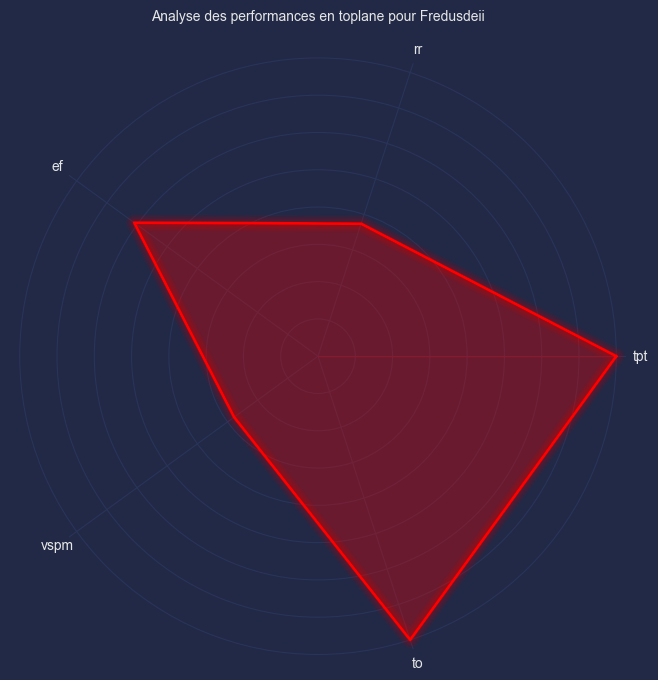

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

plt.style.use("cyberpunk")

data = {'tpt': 0.8, 'rr': 0.3737373737373737, 
        'ef': 0.609328830730266, 'vspm': 0.27813423385394645, "to": 0.8}

labels = list(data.keys())
values = list(data.values())

num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # pour fermer le polygone
values += values[:1]  # pour fermer le polygone

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))  # Augmente la taille de la figure
ax.plot(angles, values, color='red', linewidth=2)
ax.fill(angles, values, color='red', alpha=0.25)
ax.legend(loc='upper right', frameon=False)

ax.set_yticklabels([])  # Supprime les étiquettes radiales
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)  # Ajuste la taille de la police des labels
ax.set_title("Analyse des performances en toplane pour Fredusdeii", fontsize=10, pad=20, fontname='Arial')

mplcyberpunk.add_glow_effects()

plt.show()
